# **Scraping news articles from the Times of India(TOI) website and analysing them using the python libraries `nltk` and `textblob`**


First we will be axtracting all the news articles from the website www.timesofindia.indiatimes.com/HIV/news on the basis of the following:



*   Headline
*   Published Date
*   Author
*   News
*   Their URLs


**Installing and Importing all the required libraries**

In [5]:
!pip install selenium
!pip install bs4
!pip install requests
!pip3 install newspaper3k
!pip install nltk
!pip install textblob
!pip install sklearn

     |████████████████████████████████| 911kB 4.4MB/s 
     |████████████████████████████████| 215kB 4.8MB/s 
     |████████████████████████████████| 7.4MB 39.7MB/s 
     |████████████████████████████████| 51kB 20.3MB/s 
     |████████████████████████████████| 194kB 45.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
Successfully built tinysegmenter jieba3k feedparser feedfinder2


In [0]:
from selenium.webdriver.chrome.options import Options # enables options in web browser
from selenium import webdriver # web-based automation tool for Python
from newspaper import Article # Article scraping & curation
from bs4 import BeautifulSoup # Python library for pulling data out of HTML and XML files
from requests import get # standard for making HTTP requests in Python
import pandas as pd # library written for data manipulation and analysis
import sys, time #  System-specific parameters and functions
from dateutil import parser # data format handling
import string # string functions
import numpy as np#for complex mathematical calculations
import seaborn as sns
import nltk

In [7]:
#Checking for the total no. of pages

url = 'https://timesofindia.indiatimes.com/topic/HIV/news'
soup = BeautifulSoup(get(url).text, 'lxml')

max_urls = ['https://timesofindia.indiatimes.com' + soup.select('.look ')[i]['href'] for i in range(len(soup.select('.look ')))]
print("The total no. of pages is=",len(max_urls))

The total no. of pages is= 15


**Extracting all the features described above using a ` for` loop**

In [8]:
#Creating empty lists to save all the features
headlines, dates, authors, news, urls = [], [], [], [], []

#Extracting all the Headlines, dates and the urls of the articles
for index in max_urls:
    soup = BeautifulSoup(get(index).text, 'lxml')

    # Extracts the Headlines
    try:
        headline = [soup.select('span.title')[i].text.strip() for i in range(len(soup.select('span.title')))]
        print(headline)
        headlines.extend(headline)
    except:
        headlines.extend(None)

    # Extracts the published dates
    try:
        pub_date = [str(parser.parse(soup.select('span.meta')[0].text)).split()[0] for i in range(len(soup.select('span.meta')))]
        dates.extend(pub_date)
    except:
        dates.extend(None)

    # Extracts the urls
    try:
        source = ['https://timesofindia.indiatimes.com' + soup.select('.content')[i].a['href'] for i in range(len(soup.select('span.meta')))]
        urls.extend(source)
    except:
        urls.extend(None)

   

['The IPS officer who ensured that elections in Kolhapur were peaceful', 'Air raids kill 12 civilians in jihadist-held Syrian town: Monitor', 'New HIV infections reduce by 37% in Rajasthan', 'Pakistan police arrest doctor after 90 infected by HIV syringe', 'Head of embattled UNAIDS to leave post immediately', 'Madras high court sets free HIV+ man convicted for fraud', 'Advocacy event held for HIV patients', 'Accused of injecting wife with HIV, Pune doctor attempts suicide', 'HIV positive pregnant woman hangs self', 'I told my boyfriend I was HIV positive and this happened...', 'Pay attention to these 7 very common HIV symptoms in women', 'No. of pregnant women testing HIV+ dips; still over 600 this year', 'Busted:5 HIV AIDS myths', 'Diagnosed with HIV, Army jawan hangs self in cantonment', 'Transfusion of HIV blood: Panel seeks time till January 9 to give report', 'HIV+ve girl child: Committee conducts inquiry at government hospitals', 'Parents of HIV+ve kid refuse treatment at governm

Now, we check how many unique values are present in the `dates` list, total values(No. of articles)

In [9]:
print(set(dates))
print("No. articles=", len(dates))
print(type(dates[0]))

{'2018-08-30', '2018-11-04', '2018-12-26', '2019-04-05', '2019-03-12', '2019-01-22', '2018-08-08', '2019-02-02', '2018-10-05', '2018-11-30', '2018-07-15', '2019-05-14', '2018-12-02', '2019-05-25', '2018-11-27'}
No. articles= 300
<class 'str'>


**Since, we only want all those articles, out of these 300, that were published in the year 2018**
We know that all the dates are strings, so we can easily compare the first four characters(i.e., thet=year)

In [10]:
#creating variables for storing the 2018 features
new_dates=[]
new_headlines=[]
new_urls=[]

l=len(dates)
#loop for checking the year and saving those corresponding features elsewhere
for i in range(l):
  if dates[i][:4]=='2018':
    new_dates.append(dates[i])
    new_headlines.append(headlines[i])
    new_urls.append(urls[i])
dates, headlines, urls=new_dates, new_headlines, new_urls

#deleting the other lists
del(new_dates)
del(new_headlines)
del(new_urls)

print("Now, only ",len(dates)," articles remain, that were actually published in 2018")

Now, only  180  articles remain, that were actually published in 2018


I'll only be choosing the first 150 articles from these 200, as it is taking a very large amount of time to scrape articles beyong the number 150, as the website suspected our attempts.

In [0]:
dates=dates[:150]
headlines=headlines[:150]
urls=urls[:150]

Now we know that, in total, 200 articles remain, that were actually published in 2018 by The Times of India, about HIV

**Next we extract all the remaining features from the website**

In [12]:
c=0
for index in urls:
    try:
        # Parse the url to NewsPlease
        soup = BeautifulSoup(get(index).text, 'lxml')
        article = Article(index)
        article.download()
        article.parse()
        
        # Extracts the Authors
        try:
            auth=article.authors[0]
            print(auth)
            authors.append(auth)
        except:
            authors.append(None)
            
            
        # Extracts the news articles
        try:
            news_article = ''.join(i for i in ' '.join(soup.select_one('._3WlLe').text.split()) if i in string.printable)
            c+=1
            print(c)
            news.append(news_article)
        except:
            news.append(None)
                        
    except:
        news.append(None)
        authors.append(None)


Tnn
1
2
3
4
5
6
7
Tnn
8
9
Tnn
10
11
Tnn
12
Pti
13
14
Tnn
15
16
17
18
19
Tnn
20
21
Ei Samay
22
23
24
25
Tnn
26
27
28
Tnn
29
30
Pti
31
Farzana Patowari
32
33
34
Tnn
35
36
Shobita Dhar
37
Tnn
38
39
Tnn
40
Tnn
41
42
Tnn
43
Tnn
44
45
Tnn
46
47
Pti
48
49
50
Pti
51
Tnn
52
Tnn
53
54
Tnn
55
56
57
Ketaki Desai
58
Tnn
59
Hemanta Pradhan
60
Ians
61
62
63
64
65
66
67
68
Tnn
69
Tnn
70
Tnn
71
72
73
Tnn
74
75
Tnn
76
Tnn
77
78
Tnn
79
80
Tnn
81
82
Tnn
83
84
85
Tnn
86
Tnn
87
88
89
Updated
90
Tnn
91
92
Swati Rathor
Pti
93
Timesofindia.Com
94
95
96
Pti
97
98
Tnn
99
100
101
Tnn
102
Tnn
103
Tnn
104
105
106
107
108
Tnn
109
Tnn
110
111
Tnn
112
Tnn
113
114
115
Tnn
116
117
Tnn
118
119
120
121
M Allirajan
Tnn
122
Manash Pratim Gohain
123
Rupali Mukherjee
Tnn
124
125
126
127
Tnn
128
Tnn
129
130
Pti
131
Tnn
132
Tnn
133
134
Updated
135
136


**Now combining all the above extracted features in a DataFrame using `pandas`**

In [13]:
df=pd.DataFrame({'Headlines': headlines,
                 'Authors' : authors,
                 'Article' : news,
                 'Published_Dates' : dates,
                 'Source_URLs' : urls
                })
print(len(df))
#Checking for any missing values in the Dataframe
print(df.isna().sum())

150
Headlines           0
Authors            83
Article            14
Published_Dates     0
Source_URLs         0
dtype: int64


We see here that the` 'Authors'` column has many missing valus. So, we simply go ahead and delete it.
Also, after that we delete all the rows that have missing values(which are only present in the `'Articles`' column)

In [14]:
#Dropping the 'Authors' column
df=df.drop(columns=['Authors'])

#Now also dropping all the other rows with empty values
df=df.dropna()
df.shape

(136, 4)

# **Preliminary Text Analysis**

Finally, we have all the data about the articles that we need for our next part, which is the analysis. We  will do the following:



*   word count
*   numerics count
*   uppercase words count
*   stop words count
*   rare words count
*   Average word length
*   Character count

We will do these for each of the articles and create a new column for each of these values for their corresponding columns.




In [15]:

#Firstly we will do some exploration of the text

# 1. Counting the number of words in each article
df['word_count'] = df['Article'].apply(lambda x: len(str(x).split(" ")))
df['word_count'].describe()

count    136.000000
mean     423.176471
std      156.368789
min      144.000000
25%      297.750000
50%      401.000000
75%      504.250000
max      959.000000
Name: word_count, dtype: float64

From this, we get to know that the average length of an article is about 419 words. The word count ranges from 145 words to 959 words.

Now, plotting the word count in a s=density plot:

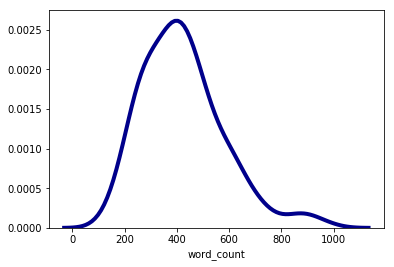

In [18]:

sns.distplot(df['word_count'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

This density plot shows us that there are a few outliers that have word counts more than 800.
It also shows us that the distribution is a litte skewed towards the left.

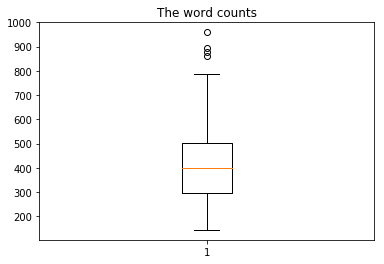

In [19]:
import matplotlib.pyplot as plt

plt.boxplot(df['word_count'])
plt.title("The word counts")
plt.show()

This boxplot confirms both of aur observations from the density plot above.

**Identifying the stopwords and the rare words**
Stopwords are the most common words that occur

In [20]:
stop_words = pd.Series(' '.join(df['Article']).split()).value_counts()[:10]
rare_words = pd.Series(' '.join(df['Article']).split()).value_counts()[-10:]
print("The top 10 stop words(most common words) are:\n", stop_words)
print("The top 10 rare words(most uncommon words) are:\n", rare_words)

The top 10 stop words(most common words) are:
 the         2576
results     2454
election    2316
of          1390
to          1271
and         1171
in           979
a            788
for          642
The          570
dtype: int64
The top 10 rare words(most uncommon words) are:
 Gerontology    1
disrupting     1
536            1
neonatal       1
criminals,     1
reserved       1
rupture        1
Health.        1
vote           1
brazen         1
dtype: int64


Now doing the rest of the steps

In [22]:
#No. of characters
df['char_count']=df['Article'].str.len()

#No. of numerics
df['numerics']=df['Article'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

#No. of uppercase words
df['upper_case']=df['Article'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

#Average word length
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
df['avg_wlen']=df['Article'].apply(lambda x: avg_word(x))

print(df.columns)
print(df.head())

Index(['Headlines', 'Article', 'Published_Dates', 'Source_URLs', 'word_count',
       'char_count', 'numerics', 'upper_case', 'avg_wlen'],
      dtype='object')
                                           Headlines  ...  avg_wlen
0  Women, children with HIV narrate ordeal at cit...  ...  5.507143
1  World Aids Day: Ambala Jail provides treatment...  ...  5.418000
2  Number of HIV cases increasing among young: Ex...  ...  5.445378
3  Served persons with HIV, AIDS for decade, woma...  ...  5.148620
4  Steep increase in HIV/AIDS infection among Tam...  ...  5.153322

[5 rows x 9 columns]


# **Text Pre-processing**

---
Next we will apply the following operations on this dataframe.


*   Stopword removal
*   Rare word removal
*   Punctuation Removal
*   Lowercasing
*   Tokenization
*   Lemmatization: converting all the words into their root word


Note:- We won't be doing the Spelling Correction, because these are articles written by professionals, so we assume, that the last thing they will have is a spelling mistake. 

No we will be using the python library `nltk` and `textblob ` for these processes.

**Stop word removal**

Stop words create most of the noise in a text and have to be removed in order to gain interactive insights from the text data.

In [24]:

from textblob import TextBlob
from textblob import Word

#Stop word removal
df['Article']=df['Article'].apply(lambda x: ' '.join([x for x in x.split() if x not in stop_words]))
df.head()

,Headlines,Article,Published_Dates,Source_URLs,word_count,char_count,numerics,upper_case,avg_wlen
0,"Women, children with HIV narrate ordeal at cit...",JAIPUR: More than 100 women children living wi...,2018-12-02,https://timesofindia.indiatimes.com/city/jaipu...,420,2732,1,19,5.507143
1,World Aids Day: Ambala Jail provides treatment...,AMBALA: 18 HIV+ve inmates Ambala Central Jail ...,2018-12-02,https://timesofindia.indiatimes.com/city/gurga...,500,3208,9,21,5.418000
2,Number of HIV cases increasing among young: Ex...,NAGPUR: While incidence HIV has reduced all ov...,2018-12-02,https://timesofindia.indiatimes.com/city/nagpu...,478,3069,2,20,5.445378
3,"Served persons with HIV, AIDS for decade, woma...","CHANDIGARH: Thirty-six-yearold Pooja Thakur, w...",2018-12-02,https://timesofindia.indiatimes.com/city/chand...,471,2895,2,30,5.148620
4,Steep increase in HIV/AIDS infection among Tam...,CHENNAI: As government prepares observe Intern...,2018-12-02,https://timesofindia.indiatimes.com/city/chenn...,587,3611,16,20,5.153322


**Rare word removal**

In [25]:
df['Article']=df['Article'].apply(lambda x: ' '.join([x for x in x.split() if x not in rare_words]))
df.head()

,Headlines,Article,Published_Dates,Source_URLs,word_count,char_count,numerics,upper_case,avg_wlen
0,"Women, children with HIV narrate ordeal at cit...",JAIPUR: More than 100 women children living wi...,2018-12-02,https://timesofindia.indiatimes.com/city/jaipu...,420,2732,1,19,5.507143
1,World Aids Day: Ambala Jail provides treatment...,AMBALA: 18 HIV+ve inmates Ambala Central Jail ...,2018-12-02,https://timesofindia.indiatimes.com/city/gurga...,500,3208,9,21,5.418000
2,Number of HIV cases increasing among young: Ex...,NAGPUR: While incidence HIV has reduced all ov...,2018-12-02,https://timesofindia.indiatimes.com/city/nagpu...,478,3069,2,20,5.445378
3,"Served persons with HIV, AIDS for decade, woma...","CHANDIGARH: Thirty-six-yearold Pooja Thakur, w...",2018-12-02,https://timesofindia.indiatimes.com/city/chand...,471,2895,2,30,5.148620
4,Steep increase in HIV/AIDS infection among Tam...,CHENNAI: As government prepares observe Intern...,2018-12-02,https://timesofindia.indiatimes.com/city/chenn...,587,3611,16,20,5.153322


**Lowercasing**

In [27]:
df['Article']=df['Article'].apply(lambda x: x.lower())
df.head()

,Headlines,Article,Published_Dates,Source_URLs,word_count,char_count,numerics,upper_case,avg_wlen
0,"Women, children with HIV narrate ordeal at cit...",jaipur: more than 100 women children living wi...,2018-12-02,https://timesofindia.indiatimes.com/city/jaipu...,420,2732,1,19,5.507143
1,World Aids Day: Ambala Jail provides treatment...,ambala: 18 hiv+ve inmates ambala central jail ...,2018-12-02,https://timesofindia.indiatimes.com/city/gurga...,500,3208,9,21,5.418000
2,Number of HIV cases increasing among young: Ex...,nagpur: while incidence hiv has reduced all ov...,2018-12-02,https://timesofindia.indiatimes.com/city/nagpu...,478,3069,2,20,5.445378
3,"Served persons with HIV, AIDS for decade, woma...","chandigarh: thirty-six-yearold pooja thakur, w...",2018-12-02,https://timesofindia.indiatimes.com/city/chand...,471,2895,2,30,5.148620
4,Steep increase in HIV/AIDS infection among Tam...,chennai: as government prepares observe intern...,2018-12-02,https://timesofindia.indiatimes.com/city/chenn...,587,3611,16,20,5.153322


**Punctuation Removal**

In [28]:
df['Article']=df['Article'].str.replace('[{!@#$%()}]','')
df.head()

,Headlines,Article,Published_Dates,Source_URLs,word_count,char_count,numerics,upper_case,avg_wlen
0,"Women, children with HIV narrate ordeal at cit...",jaipur: more than 100 women children living wi...,2018-12-02,https://timesofindia.indiatimes.com/city/jaipu...,420,2732,1,19,5.507143
1,World Aids Day: Ambala Jail provides treatment...,ambala: 18 hiv+ve inmates ambala central jail ...,2018-12-02,https://timesofindia.indiatimes.com/city/gurga...,500,3208,9,21,5.418000
2,Number of HIV cases increasing among young: Ex...,nagpur: while incidence hiv has reduced all ov...,2018-12-02,https://timesofindia.indiatimes.com/city/nagpu...,478,3069,2,20,5.445378
3,"Served persons with HIV, AIDS for decade, woma...","chandigarh: thirty-six-yearold pooja thakur, w...",2018-12-02,https://timesofindia.indiatimes.com/city/chand...,471,2895,2,30,5.148620
4,Steep increase in HIV/AIDS infection among Tam...,chennai: as government prepares observe intern...,2018-12-02,https://timesofindia.indiatimes.com/city/chenn...,587,3611,16,20,5.153322


# **Advanced Processing**

---
Now well be doing some more advanced processing work with the articles, like:



*   N-grams
*   Term Frequency(TF)
*   Inverse Document Frequency(IDF)
*   Term Frequency-Inverse Document Frequency(TF-IDF)




# **Visualizing the top 15 N-grams(Only Uni-grams, Bi-grams and Tri-grams)**

We will visualize them using barplots with the help of Python's `seaborn` library.

**Uni-grams**

In [35]:


from sklearn.feature_extraction.text import CountVectorizer
import re
#Most frequently occuring words
arr=list(df['Article'])

def get_top_n_words(arr, n=None):
    vec = CountVectorizer().fit(arr)
    bag_of_words = vec.transform(arr)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
  
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(arr, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["uni-grams", "Freq"]
print(top_df)

   uni-grams  Freq
0       that   445
1        hiv   442
2         is   428
3       said   420
4        lok   411
5      sabha   411
6        was   409
7         on   406
8    pradesh   331
9       with   315
10      from   281
11        by   279
12        at   276
13        as   266
14       are   264
15      have   264
16        he   245
17        it   242
18     blood   239
19       has   222


[Text(0, 0, 'that'),
 Text(0, 0, 'hiv'),
 Text(0, 0, 'is'),
 Text(0, 0, 'said'),
 Text(0, 0, 'lok'),
 Text(0, 0, 'sabha'),
 Text(0, 0, 'was'),
 Text(0, 0, 'on'),
 Text(0, 0, 'pradesh'),
 Text(0, 0, 'with'),
 Text(0, 0, 'from'),
 Text(0, 0, 'by'),
 Text(0, 0, 'at'),
 Text(0, 0, 'as'),
 Text(0, 0, 'are'),
 Text(0, 0, 'have'),
 Text(0, 0, 'he'),
 Text(0, 0, 'it'),
 Text(0, 0, 'blood'),
 Text(0, 0, 'has')]

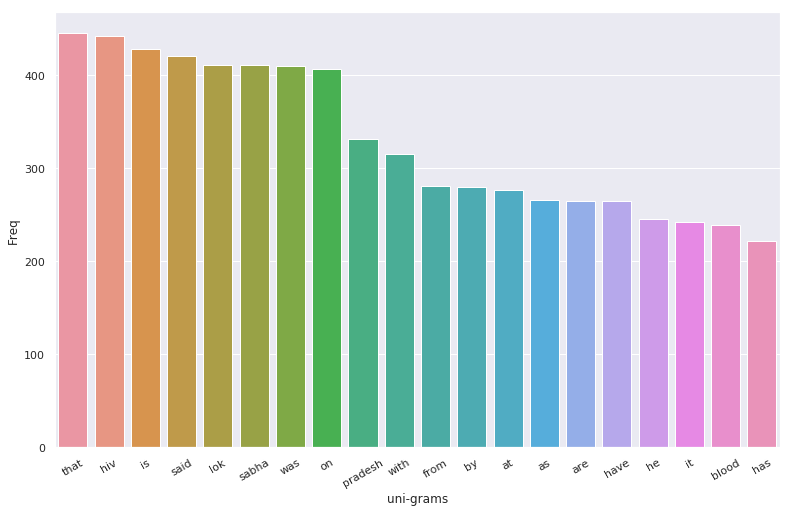

In [36]:
#Now visualizing the barplot
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="uni-grams", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

**Bi-grams**

                          Bi-gram  Freq
0                       lok sabha   411
1                      india news   145
2                     times india   136
3                        news app   136
4                      app latest   136
5                  sabha election   136
6                 election result   136
7         2019telangana elections   136
8            elections 2019odisha   136
9     2019odisha 2019chhattisgarh   136
10    2019chhattisgarh 2019punjab   136
11     2019punjab 2019uttarakhand   136
12  2019uttarakhand 2019karnataka   136
13       2019karnataka 2019madhya   136
14             2019madhya pradesh   136
15           pradesh 2019himachal   136
16           2019himachal pradesh   136
17            pradesh 2019haryana   136
18          2019haryana 2019delhi   136
19      2019delhi 2019maharashtra   136


[Text(0, 0, 'lok sabha'),
 Text(0, 0, 'india news'),
 Text(0, 0, 'times india'),
 Text(0, 0, 'news app'),
 Text(0, 0, 'app latest'),
 Text(0, 0, 'sabha election'),
 Text(0, 0, 'election result'),
 Text(0, 0, '2019telangana elections'),
 Text(0, 0, 'elections 2019odisha'),
 Text(0, 0, '2019odisha 2019chhattisgarh'),
 Text(0, 0, '2019chhattisgarh 2019punjab'),
 Text(0, 0, '2019punjab 2019uttarakhand'),
 Text(0, 0, '2019uttarakhand 2019karnataka'),
 Text(0, 0, '2019karnataka 2019madhya'),
 Text(0, 0, '2019madhya pradesh'),
 Text(0, 0, 'pradesh 2019himachal'),
 Text(0, 0, '2019himachal pradesh'),
 Text(0, 0, 'pradesh 2019haryana'),
 Text(0, 0, '2019haryana 2019delhi'),
 Text(0, 0, '2019delhi 2019maharashtra')]

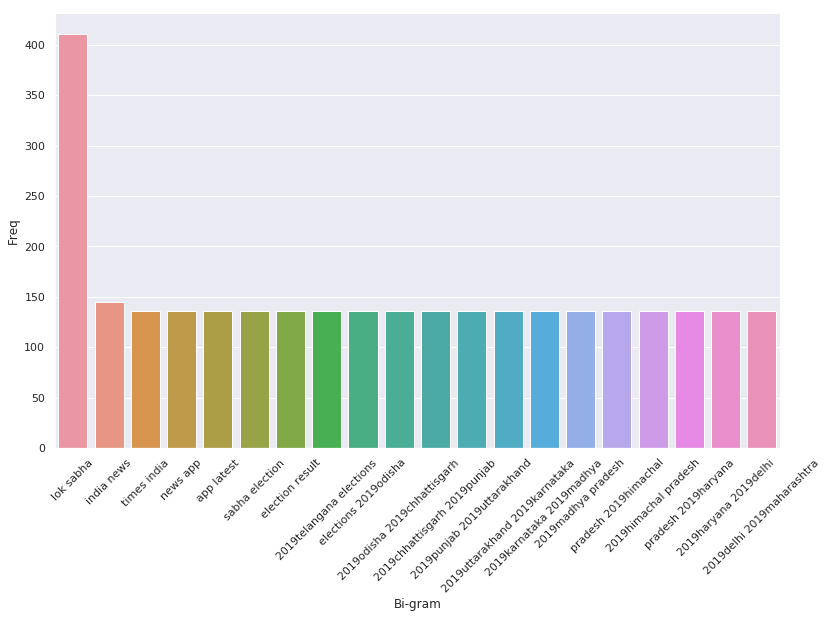

In [38]:
def get_top_n2_words(arr, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(arr)
    bag_of_words = vec1.transform(arr)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(arr, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#The barplot of the bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

**Tri-grams**

                                       Tri-gram  Freq
0                              times india news   136
1                                india news app   136
2                               news app latest   136
3                            lok sabha election   136
4                         sabha election result   136
5            2019telangana elections 2019odisha   136
6         elections 2019odisha 2019chhattisgarh   136
7        2019odisha 2019chhattisgarh 2019punjab   136
8   2019chhattisgarh 2019punjab 2019uttarakhand   136
9      2019punjab 2019uttarakhand 2019karnataka   136
10     2019uttarakhand 2019karnataka 2019madhya   136
11             2019karnataka 2019madhya pradesh   136
12              2019madhya pradesh 2019himachal   136
13                 pradesh 2019himachal pradesh   136
14             2019himachal pradesh 2019haryana   136
15                pradesh 2019haryana 2019delhi   136
16        2019haryana 2019delhi 2019maharashtra   136
17         2019delhi 2019mah

[Text(0, 0, 'times india news'),
 Text(0, 0, 'india news app'),
 Text(0, 0, 'news app latest'),
 Text(0, 0, 'lok sabha election'),
 Text(0, 0, 'sabha election result'),
 Text(0, 0, '2019telangana elections 2019odisha'),
 Text(0, 0, 'elections 2019odisha 2019chhattisgarh'),
 Text(0, 0, '2019odisha 2019chhattisgarh 2019punjab'),
 Text(0, 0, '2019chhattisgarh 2019punjab 2019uttarakhand'),
 Text(0, 0, '2019punjab 2019uttarakhand 2019karnataka'),
 Text(0, 0, '2019uttarakhand 2019karnataka 2019madhya'),
 Text(0, 0, '2019karnataka 2019madhya pradesh'),
 Text(0, 0, '2019madhya pradesh 2019himachal'),
 Text(0, 0, 'pradesh 2019himachal pradesh'),
 Text(0, 0, '2019himachal pradesh 2019haryana'),
 Text(0, 0, 'pradesh 2019haryana 2019delhi'),
 Text(0, 0, '2019haryana 2019delhi 2019maharashtra'),
 Text(0, 0, '2019delhi 2019maharashtra 2019kerala'),
 Text(0, 0, '2019maharashtra 2019kerala 2019bihar'),
 Text(0, 0, '2019kerala 2019bihar 2019gujarat')]

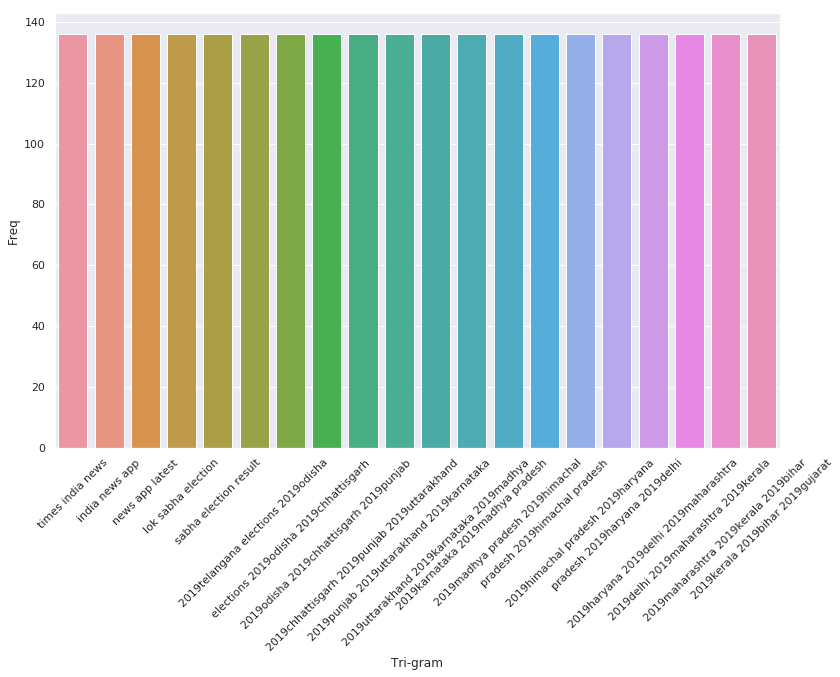

In [39]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(arr)
    bag_of_words = vec1.transform(arr)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(arr, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#The barplot
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)